# Capstone Project - Meteorite Landings 

## Context 

Meteorites have always fascinated by their unpredictability. They were constantly illustrated in Sci-Fi movies as devastating for the human race; they can, in essence, hit everywhere and anywhere, causing irreparable damages - insurmountable for the protagonists and for Planet Earth by transitivity. 

The reality is slightly different. As you will discover throughout the analysis that I have conducted, meteorites' impact have been amplified by movie directors, pejoratively. Of course they remain unpredictable, but rather inoffensive. 

## Purpose

Meteorites are intriguing. That is why I chose to learn more about them. The general objective of this analysis is to understand them to alleviate the ambiguity that they engender. To explore the dataset I started by an EDA, then I visualized the data, conducted a statistical analysis on it and then built a machine learning model to try to predict the next meteorite landings. 

I believe this study will not only be interesting to astrophysicists but to everyone who is interested in space exploration.

That said, let us dive into the engrossing world of meteorites. 

In [312]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from matplotlib.pyplot import figure
from scipy.stats import norm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, TimeSeriesSplit
from scipy import stats
from sklearn import metrics


# I. Data Wrangling
## 1. Primary Exploratory Data Analysis
### 1.1. Dataset
 I have chosen to work on an interesting dataset that I found on the NASA’s website
(https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh), encompassing the
complete list of around 45000 meteorite landings on earth since the year 601. Each meteorite
is further described by the 10 columns listed below:

▪ name: the name of the meteorite (typically a location, often modified with a
number, year, composition, etc)

▪ id: a unique identifier for the meteorite

▪ nametype: one of: -- valid: a typical meteorite -- relict: a meteorite that has
been highly degraded by weather on Earth

▪ recclass: the class of the meteorite; one of a large number of classes based on
physical, chemical, and other characteristics

▪ mass: the mass of the meteorite, in grams

▪ fall: whether the meteorite was seen falling, or was discovered after its
impact; one of: -- Fell: the meteorite's fall was observed -- Found: the
meteorite's fall was not observed

▪ year: the year the meteorite fell, or the year it was found (depending on the
value of fell)

▪ reclat: the latitude of the meteorite's landing

▪ reclong: the longitude of the meteorite's landing

▪ GeoLocation: a parentheses-enclose, comma-separated tuple that
combines reclat and reclong

In [314]:
# Reading the CSV file
# The result is a Pandas DataFrame (data). A datatype easy to read
data = pd.read_csv('/users/youcefdjeddar/downloads/meteorite-landings.csv')

In [315]:
# Exploring the data using the .head() method 
data.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


In [316]:
# Looking for missing values 
missing_values_count = data.isnull().sum() 
print(missing_values_count)

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [317]:
# Checking that the ID column has unique values
data['id'].is_unique

True

In [318]:
# Determining the percentage of missing values for each column
mass_missing_values = (missing_values_count['mass']/len(data.mass)) * 100 
year_missing_values = (missing_values_count['year']/len(data.year)) * 100 
location_missing_values = (missing_values_count['GeoLocation']/len(data.GeoLocation)) * 100
print('The percentage of missing values in the mass column is:', mass_missing_values,'%')
print ('The percentage of missing values in the year column is:', year_missing_values,'%') 
print('The percentage of missing values in the location column is:', location_missing_values,'%')

The percentage of missing values in the mass column is: 0.28655175430921337 %
The percentage of missing values in the year column is: 0.6299763758859043 %
The percentage of missing values in the location column is: 16.0009624639076 %


In [319]:
# Since it is impossible to guess the values of the missing data, it is preferable to delete them 
# We can see that all the missing values are gone
data = data.dropna()
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [320]:
# Getting some information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38116 entries, 0 to 45715
Data columns (total 10 columns):
name           38116 non-null object
id             38116 non-null int64
nametype       38116 non-null object
recclass       38116 non-null object
mass           38116 non-null float64
fall           38116 non-null object
year           38116 non-null float64
reclat         38116 non-null float64
reclong        38116 non-null float64
GeoLocation    38116 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [321]:
# Let's see how many meteorite classes the dataset has
meteorite_class = data['recclass'].value_counts() 
print(meteorite_class)

L6                 7519
H5                 6243
H6                 3898
H4                 3880
L5                 3264
LL5                2199
LL6                1660
L4                  939
H4/5                395
CM2                 330
H3                  313
CO3                 308
Iron, IIIAB         270
L3                  268
LL                  223
Ureilite            214
E3                  205
LL4                 198
CV3                 184
Howardite           179
Diogenite           178
Eucrite-pmict       169
H5/6                166
CR2                 116
Eucrite             115
Iron, IIAB          111
Mesosiderite        107
H~5                 106
Iron, ungrouped     105
LL3                  88
                   ... 
EH6-an                1
H3.8-5                1
C4/5                  1
H3.8-4                1
LL3-5                 1
H3.8/3.9              1
CV2                   1
L/LL3.2               1
LL3.1-3.5             1
Mesosiderite-B        1
H(L)3           

In [322]:
# Below we can see that the top ten classes encompass 30k meteorites, which is a lot
print('Top 10 meteorite classes:', meteorite_class[:10].sum())

Top 10 meteorite classes: 30327


In [323]:
# Nearly 80% of all the meteorites belong to one of the top ten classes
percentage_meteorites_in_the_top_ten_classes = (meteorite_class[:10].sum()/len(data)) * 100
print (percentage_meteorites_in_the_top_ten_classes)

79.56501206842272


Since 80% of the meteorites belong to one of the top ten classes, I will focus primarily on them.

In [324]:
# Extracting the needed data (from the top 10 classes)
top_10 = data['recclass'].value_counts().index.tolist()[:10]
df = data[data['recclass'].isin(top_10)]

In [325]:
len(df)

30327

The DataFrame "df" is now regrouping the meteorites of the top ten classes only. 

Let's now do some data visualization to understand more our data.

# II. Data Visualization
## 1. Intro
 The initial dataset from the NASA had 422 meteorite classes in it. A high number that did not
necessarily reflect the distribution of meteorites. Indeed, as shown in the Phase-1 (Data
Wrangling), the top ten meteorite classes encompassed approximately 80% of the total number
of meteorites. For that reason, I decided to neglect – for now, the remaining 20% of the data – for
a more concrete analysis.
## 2. Visualization
### 2.1. Scatter Plot
 After extracting the needed segments, I used the Matplotlib Library to generate a Scatter
Plot (meteorite classes on the x-axis and their mass on the y-axis) to see the distribution of the
mass per class. Surprisingly, with the notable exception of a few outliers, the distribution was
quite homogenous among the ten classes, with the majority of the meteorites having a mass
range 0-500kg. Here are some conclusions:

▪ The heaviest meteorite belongs to the H5 class;

▪ The class L6 is more homogenous;

▪ The class CM2 has the lightest meteorites.

### 2.2. Seaborn lmplot
 I used the Seaborn Library to visualize a sort of a time-series plot showing the distribution
of the landings throughout the entire timescale of the dataset. Not surprisingly, most of the landings
occurred after the 19th century, which can be explained by the restricted technological advances
prior to that time, where only landings that were actually observed by humans were recorded.
The third plot shows the mass of the meteorites that landed throughout the timescale. Here are
some conclusions:

▪ Accurate landing records really started in the 19th century;

▪ Recent meteorites seem to be heavier – which is probably due to the drastic
increase of the landing records recently. More records => more meteorite
landings => potentially heavier meteorites.
### 2.3. Plotly Library
#### 2.3.1. Scatter Plot
I opted for the Plotly Library for more esthetic plots. It’s a bit slower and requires an
API-Key to run adequately but it provides a variety of options that cannot be found
elsewhere. The scatter plot shows the distribution of the top ten meteorite classes. We
can learn, for example, that the L6 class is the oldest class observed and that the H4/5
class is contemporary.
#### 2.3.2. Scatter Map Box
This is, I believe, the most interesting plot provided by the Plotly Library. I tried to plot
the geo-location of about 35.000 the meteorite on the dataset, based on the latitude and
the longitude of the places where they landed. Surprisingly, only a minority of the
meteorites landed in the seas/oceans, despite them constituting around 70% of the
planet. 

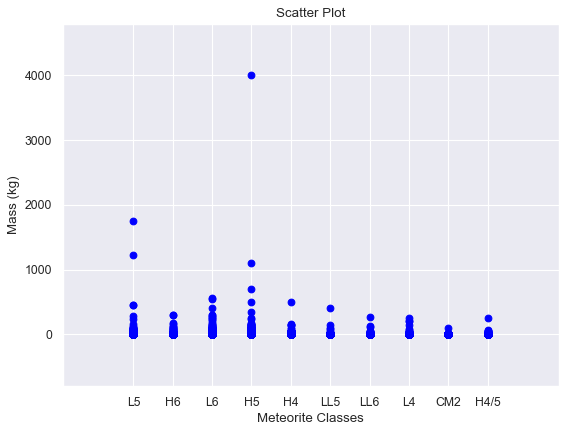

In [15]:
# Scatter plot of the ten meteorite classes on the x-axis and the mass of each meteorite on the y-axis
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set()
plt.scatter(df.recclass, df.mass/1000, marker = 'o', color = 'blue', label = 'mass')
plt.xlabel('Meteorite Classes')
plt.ylabel('Mass (kg)')
plt.title('Scatter Plot')
plt.margins (0.2)

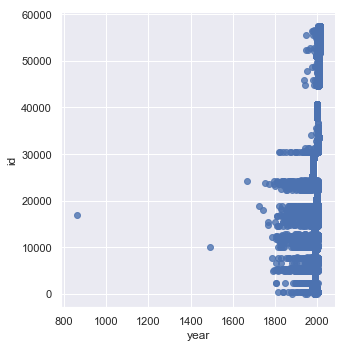

In [19]:
sns.lmplot('year', 'id', data=df, fit_reg=False)
# The plot shows that the landing frequency significantly increased starting from the 19th century

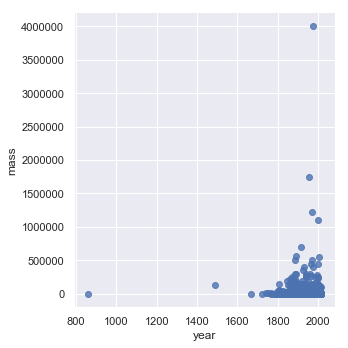

In [17]:
sns.lmplot('year', 'mass', data=df, fit_reg=False)
# The plot below shows that most of the contemporary meteorites are heavier

In [18]:
# Landings distribution on a map (using the properties lat and long)

mapbox_access_token = 'dhjrzm2c8j'
site_lat = df.reclat
site_lon = df.reclong
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        hoverinfo='text'
    ),
    ]





fig = dict(data=data)

py.iplot(fig, filename='jupyter-Meteorite-Landings')

NameError: name 'go' is not defined

In [ ]:
# Landings distribution on a map (using the properties lat and long)

mapbox_access_token = 'dhjrzm2c8j'
site_lat = df.reclat
site_lon = df.reclong
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        hoverinfo='text'
    ),
    ]





fig = dict(data=data)

py.iplot(fig, filename='jupyter-Meteorite-Landings')

In [143]:
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) #plotting equator and tropics and polar circles

x, y = map(valids.reclong,valids.reclat)

map.scatter(x, y, marker='.',alpha=0.25,c='green',edgecolor='None')
plt.title('Map of all valid impacts', fontsize=15)

NameError: name 'Basemap' is not defined

## Note
Because the library required an API-Key to run, I couldn’t share the plots on the Jupyter Notebook. Screenshots of the Scatter Plots and the Scatter Map Box can be found here: https://github.com/youcefjd/Meteorite-Project-Phase-2/blob/master/Data%20Visualization.pdf

# III. Statistical Thinking
 Often, it is very useful to think "statistically". Numbers are the language of the universe, they help us understand things more clearly. Conducting a statistical analysis helped me to understand some "hidden" aspects of the dataset.
In this section, I tried to perform a coherent statistical analysis. The dataset being very tedious, the results are quite restricted. However, they offer an interesting "plus-value".

In [130]:
# The method "describe" is always a great start
df.describe()

,id,mass,year,reclat,reclong
count,25483.000000,2.548300e+04,25483.000000,25483.000000,25483.000000
mean,20831.443315,1.769370e+03,1989.378762,-52.591016,80.269438
std,14809.077171,3.240141e+04,21.614454,44.197285,82.423629
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330
25%,9497.500000,5.925000e+00,1985.000000,-84.000000,35.666670
50%,18741.000000,2.490000e+01,1992.000000,-72.782778,75.279444
75%,27144.500000,1.480000e+02,2000.000000,-30.883330,159.750000
max,57455.000000,4.000000e+06,2013.000000,81.166670,175.730280


The "mass" column seems to be interesting. I will focus on analyzing it further. 

In [131]:
df.mass.describe()

count    2.548300e+04
mean     1.769370e+03
std      3.240141e+04
min      1.000000e-02
25%      5.925000e+00
50%      2.490000e+01
75%      1.480000e+02
max      4.000000e+06
Name: mass, dtype: float64

Text(0.5,1,'Seaborn Box Plot')

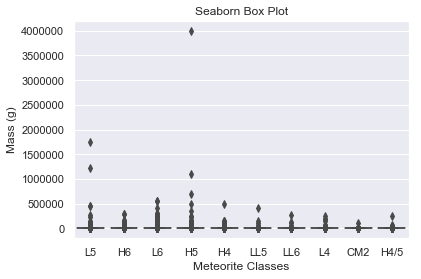

In [132]:
sns.boxplot(x ='recclass', y='mass', data = df)
plt.xlabel('Meteorite Classes')
plt.ylabel('Mass (g)')
plt.title('Seaborn Box Plot')

The Box Plot doesn't offer much indications. I will try to "zoom" on the y-axis, since the mass is on average in between 0 and 100g

Text(0.5,1,'Seaborn Box Plot')

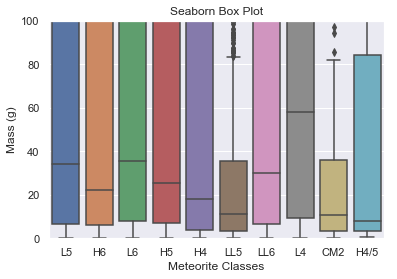

In [133]:
sns.boxplot(x ='recclass', y='mass', data = df)
plt.ylim(0, 100)
plt.xlabel('Meteorite Classes')
plt.ylabel('Mass (g)')
plt.title('Seaborn Box Plot')


Another interesting statistical figure is the EDF (Empirical Distribution Function). 

In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. - source Wikipedia

Another definition: 

An empirical cumulative distribution function (also called the empirical distribution function, ECDF, or just EDF) and a cumulative distribution function are basically the same thing: they are both probability models for data. However, while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data. To put this another way, the ECDF is the probability distribution you would get if you sampled from your sample, instead of the population. Let’s say you have a set of experimental (observed) data x1, x2 …,xn. The EDF will give you the fraction of sample observations less than or equal to a particular value of x.




Text(0.5,1,'EDF')

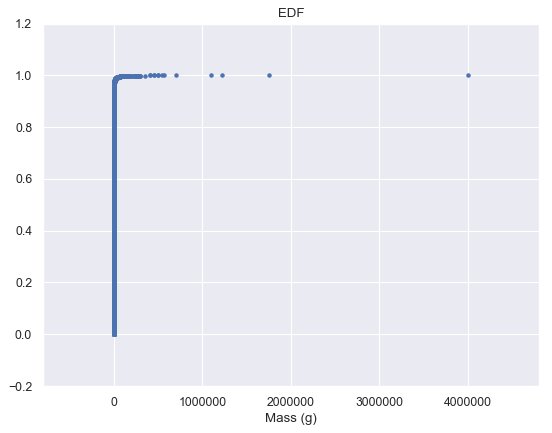

In [134]:
# Extracting the mass column and plotting it
x = np.sort(df.mass)
y = np.arange(1, len(x)+1)/len(x)
sns.set()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
_ = plt.plot(x, y, marker= '.', linestyle='none')
plt.xlim = (0, 1000000)
plt.margins(0.2)
plt.xlabel('Mass (g)')
plt.title('EDF')

The graph doesn't tell us a lot about the distribution of the data (the mass). There's another figure that could help us have more information about the distribution, it is called the PDF (Probability Density Function)

In probability theory, a probability density function (PDF), or density of a continuous random variable, is a function, whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample.[citation needed] In other words, while the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there are an infinite set of possible values to begin with), the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would equal one sample compared to the other sample. - source Wikipedia

Text(0.5,0,'Mass (g)')

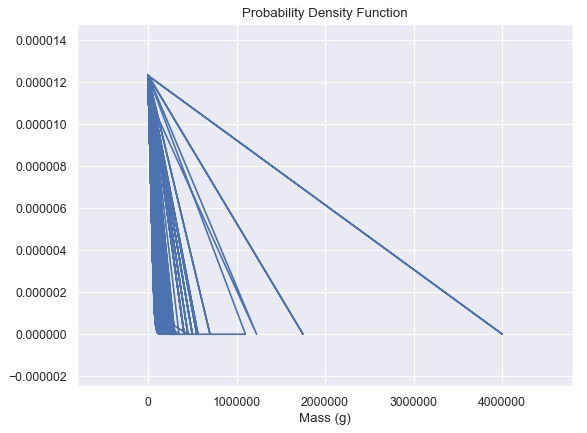

In [135]:
mass = df.mass
mean = np.mean(mass)
std = np.std(mass)
length = len(df)
p=norm.pdf(mass, mean, std)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(mass, p)
plt.margins(0.2)
plt.title ('Probability Density Function')
plt.xlabel('Mass (g)')

The PDF has an interesting shape. Unfortunately, It is very ambiguious. 

Last thing, we know that the mean of our population is 1769.3703604756115g. But is it the true mean? To make sure that it is the case it is advisable to perform a t-test.

## What is a t-score?

Simply put, a t-score is the number of standard deviations from the mean a data point is. It helps us to determine the true mean of our population.

## Why a t-test and not a z-test?

Simply because the standard deviation of our sample is uknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

## Performing a t-test 

### Null Hyothesis 

Ho: True Population Mean is 1769.3703604756115g 

H1: True Population Mean is not 1769.3703604756115g



In [138]:
np.mean(df.mass)

1769.3703604756115

In [139]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(df.mass, 1769.3703604756115)[0]
p = stats.ttest_1samp(df.mass, 1769.3703604756115)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 0.0
p-value: 1.0


The results tell us unequivocally that the true mean of the population is indeed  1769.3703604756115g

## Conclusion

The dataset is not normally distributed. After some statistical analysis I haven't learnt a lot about it. 

# IV. Machine Learning 

Here comes the fun part: machine learning. The dataset being very tedious, I am not expecting miracles. However, I am certain that using the right model I can predict something interesting. 

## Note

I have tried numerous algorithms on the dataset. My experiments can be found here: https://github.com/youcefjd/Meteorite-Project-Phase-4/blob/master/Machine_Learning%20(1).ipynb

I am, here, going to use what I learned from the experiments to directly apply the best model on the dataset.

### What to predict?

Based on some selected features, I will try to predict where the next meteorite landing will occur.

### Random Forests Regressor

From my experiments, I have determined that RFR is the algorithm that gives the best results on the dataset. 

In [326]:
# Making sure that we have no NaNs
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [327]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"


In [331]:
len(df)

30327

In [339]:
from sklearn.preprocessing import LabelEncoder
df['recclass'] = LabelEncoder().fit_transform(df['recclass'])

/Users/youcefdjeddar/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [343]:
# Selecting the features and the target variable 
X = df[['recclass', 'mass', 'year']] # Selecting the class of the meteorite, their mass and the year of landing
y = df[['reclat', 'reclong']] # The target variable represents the latitude and longitude of the expected landing

In [341]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,6,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,4,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
4,Achiras,370,Valid,7,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
7,Agen,392,Valid,3,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,7,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"


As we can see, class names have been replaced by numbers, unique to each class.

In [342]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0) 
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
rfr = RandomForestRegressor().fit(X_train, y_train)

/Users/youcefdjeddar/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [344]:
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.92
Test set score: 0.52
CPU times: user 223 ms, sys: 7.45 ms, total: 230 ms
Wall time: 232 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Clear overfitting.
Random Forest has different parameters that we can explore to possibly enhance the score on the test set.

Before I proceed, I will have a look at the recent landings to get some insights. 

In [345]:
df.sort_values(by=['year']).tail(20)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
30588,Northwest Africa 7587,56428,Valid,7,1877.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30586,Northwest Africa 7584,56427,Valid,7,195.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30513,Northwest Africa 7495,56213,Valid,6,2144.67,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30583,Northwest Africa 7578,56425,Valid,9,51.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30585,Northwest Africa 7582,56426,Valid,7,126.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30574,Northwest Africa 7568,56561,Valid,0,12.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30557,Northwest Africa 7548,56407,Valid,5,1300.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
86,Battle Mountain,56133,Valid,7,2900.00,Fell,2012.0,40.66813,-117.18913,"(40.668130, -117.189130)"
30539,Northwest Africa 7520,56318,Valid,1,1550.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"
30535,Northwest Africa 7517,56295,Valid,8,374.00,Found,2012.0,0.00000,0.00000,"(0.000000, 0.000000)"


It looks like the recent landings have not yet been recorded adequatly as their geographic location is missing. Let's see how much data is actually absent from the dataset.

In [346]:
y[y==0.000000].count()

reclat     4844
reclong    4622
dtype: int64

Quite a lot of missing values. The prediction will undoubtedly get altered. I will remove the missing values to get more accurate predictions. I am expecting the prediction score to drop a little bit. 

In [347]:
df = df[(df[['reclat','reclong']] != 0).all(axis=1)]

In [348]:
df.sort_values(by=['year']).tail(20)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12052,Frontier Mountain 10024,54803,Valid,3,3.9,Found,2011.0,-72.95202,160.50618,"(-72.952020, 160.506180)"
12051,Frontier Mountain 10019,54802,Valid,1,4.3,Found,2011.0,-72.95230,160.50380,"(-72.952300, 160.503800)"
12053,Frontier Mountain 10027,54804,Valid,3,4.0,Found,2011.0,-72.95202,160.50618,"(-72.952020, 160.506180)"
12049,Frontier Mountain 10015,54800,Valid,1,3.5,Found,2011.0,-72.95215,160.50155,"(-72.952150, 160.501550)"
37359,Sayh al Uhaymir 541,55556,Valid,4,3298.0,Found,2011.0,20.76578,57.28332,"(20.765780, 57.283320)"
37358,Sayh al Uhaymir 540,55555,Valid,7,120.0,Found,2011.0,21.05918,57.27620,"(21.059180, 57.276200)"
37357,Sayh al Uhaymir 539,55554,Valid,7,34.0,Found,2011.0,21.05970,57.27632,"(21.059700, 57.276320)"
12050,Frontier Mountain 10018,54801,Valid,4,2.6,Found,2011.0,-72.95205,160.48720,"(-72.952050, 160.487200)"
37356,Sayh al Uhaymir 538,55553,Valid,7,154.0,Found,2011.0,21.10707,57.04363,"(21.107070, 57.043630)"
12047,Frontier Mountain 10002,54799,Valid,4,2.7,Found,2011.0,-72.95290,160.47965,"(-72.952900, 160.479650)"


The dataframe looks better.

In [351]:
len(df)

25483

In [352]:
from sklearn.preprocessing import LabelEncoder
df['recclass'] = LabelEncoder().fit_transform(df['recclass'])

In [353]:
df_sorted = df.sort_values(by=['year'])

In [354]:
X = df_sorted[['recclass', 'mass', 'year']] # Selecting the class of the meteorite, their mass and the predicted landing year
y = df_sorted[['reclat', 'reclong']] # The target variable represents the latitude and longitude of the expected landing

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_trainval, y_trainval, random_state = 0) 
rfr = RandomForestRegressor().fit(X_train, y_train)

/Users/youcefdjeddar/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [356]:
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.92
Test set score: 0.54
CPU times: user 235 ms, sys: 9.39 ms, total: 244 ms
Wall time: 262 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

As expected, the score on both the training and the test sets dropped, but not drastically. Now I am certain that the results of the model will be as precise as possible. 

Let's do some Hyperparameter Tuning! 

In [357]:
rfr = RandomForestRegressor(n_estimators = 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.75
Test set score: 0.31
CPU times: user 29.3 ms, sys: 1.04 ms, total: 30.3 ms
Wall time: 31.1 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Random Forest with one single estimator is equivalent to the decision tree algorithm.

Below are further explorations of the algorithm in order to prevent it from overfitting. I will also attempt to play around with some parameters to find the best combination for the dataset. 

## Cross Validation

In [358]:
rfr = RandomForestRegressor(n_estimators = 20, min_samples_leaf = 3, max_features = 0.5, n_jobs = 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.76
Test set score: 0.59
CPU times: user 179 ms, sys: 4.73 ms, total: 184 ms
Wall time: 185 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [359]:
kfold = KFold(n_splits=15, shuffle=True, random_state=0)
scores = cross_val_score(rfr, X_test, y_test, cv =kfold)  
print("Average cross-validation score: {:.2f}".format(scores.mean()))
%time cross_val_score(rfr, X_test, y_test, cv =kfold)

Average cross-validation score: 0.56
CPU times: user 915 ms, sys: 7.14 ms, total: 922 ms
Wall time: 943 ms


array([0.57427, 0.57045, 0.52171, 0.55276, 0.63545, 0.52026, 0.53467, 0.53274, 0.58184, 0.49622, 0.64455,
       0.48991, 0.58874, 0.56137, 0.59643])

In [360]:
kfold = KFold(n_splits=15, shuffle=False, random_state=0)
scores = cross_val_score(rfr, X_test, y_test, cv =kfold)  
print("Average cross-validation score: {:.2f}".format(scores.mean()))
%time cross_val_score(rfr, X_test, y_test, cv =kfold)

Average cross-validation score: 0.56
CPU times: user 885 ms, sys: 2.8 ms, total: 887 ms
Wall time: 891 ms


array([0.54841, 0.49114, 0.54457, 0.51437, 0.53563, 0.54937, 0.58923, 0.62069, 0.54665, 0.52976, 0.55153,
       0.58349, 0.57214, 0.62425, 0.53734])

# -------------------------------------------------------------------------------------

In [361]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [362]:
n_test = 6000  
n_trainval = len(df_sorted)-n_test
raw_trainval, raw_test = split_vals(df_sorted, n_trainval)
X_trainval, X_test = split_vals(X, n_trainval)
y_trainval, y_test = split_vals(y, n_trainval)

X_trainval.shape, y_trainval.shape, X_test.shape, y_test.shape

((19483, 3), (19483, 2), (6000, 3), (6000, 2))

In [374]:
n_valid = 4000  
n_train = len(X_trainval) - n_valid
raw_train, raw_valid = split_vals(X_trainval, n_train)
X_train, X_valid = split_vals(X_trainval, n_train)
y_train, y_valid = split_vals(y_trainval, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((15483, 3), (15483, 2), (4000, 3), (4000, 2))

In [391]:
X_train.head()

,recclass,mass,year
703,7,472.0,860.0
283,9,127000.0,1491.0
1037,4,40.0,1668.0
800,6,39.0,1723.0
721,4,14360.0,1741.0


In [392]:
X_train.tail()

,recclass,mass,year
34581,8,81.3,1997.0
33959,8,40.8,1997.0
34580,4,15.2,1997.0
34579,8,4.1,1997.0
34578,8,1.8,1997.0


In [393]:
X_valid.head()

,recclass,mass,year
34583,6,39.30,1997.0
16211,7,1579.00,1997.0
16212,6,1440.00,1997.0
16213,7,268.08,1997.0
34192,8,16.80,1997.0


In [394]:
X_valid.tail()

,recclass,mass,year
23371,7,27.83,2000.0
23346,6,16.99,2000.0
23345,9,16.24,2000.0
23344,9,38.48,2000.0
23343,4,34.24,2000.0


In [395]:
X_test.head()

,recclass,mass,year
23342,9,20.58,2000.0
23341,7,20.42,2000.0
23340,9,55.93,2000.0
23339,9,34.76,2000.0
23338,6,27.43,2000.0


In [396]:
X_test.tail()

,recclass,mass,year
17387,5,25.6,2012.0
17386,6,50.1,2012.0
22890,7,2854.0,2012.0
17245,9,212.0,2012.0
194,8,100000.0,2013.0


In [399]:
y_test.head()

,reclat,reclong
23342,-79.68333,155.75
23341,-79.68333,155.75
23340,-79.68333,155.75
23339,-79.68333,155.75
23338,-79.68333,155.75


In [401]:
rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, max_depth = 10, n_jobs = -1, oob_score = True).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.67
Test set score: -0.71
CPU times: user 1.58 s, sys: 15.7 ms, total: 1.59 s
Wall time: 774 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

## Grid Search 

In [382]:
print("Size of training set: {}    size of validation set: {}     size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for n_estimators in [1, 10, 20,  50, 100]:
    for min_samples_leaf in [1, 3, 10, 20, 50, 100]:
        for max_depth in [1, 2, 3, 4, 5, 10, 15]:
                rf = RandomForestRegressor(n_estimators = n_estimators,min_samples_leaf = min_samples_leaf,
                                      max_depth = max_depth)
                rf.fit(X_train, y_train)
                score = rf.score(X_valid, y_valid)
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                              'max_depth': max_depth}
                    rf = RandomForestRegressor(**best_parameters)
                    rf.fit(X_trainval, y_trainval)
                    test_score = rf.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score)) 
print("Best parameters: ", best_parameters)
%time print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 15483    size of validation set: 4000     size of test set: 6000

Best score on validation set: 0.24
Best parameters:  {'n_estimators': 10, 'min_samples_leaf': 50, 'max_depth': 10}
Test set score with best parameters: -0.15
CPU times: user 33 µs, sys: 9 µs, total: 42 µs
Wall time: 52 µs


# --------------------------------------------------------------------------------

The function selects the best values of the three parameters. 

In [44]:
rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, max_depth = 10, n_jobs = -1, oob_score = True).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))
%time rfr.fit(X_train, y_train)

Training set score: 0.63
Test set score: 0.57
CPU times: user 1.55 s, sys: 14.3 ms, total: 1.57 s
Wall time: 654 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

## Understanding Grid Search  
The reason why I chose to incorporate the validation set into the function is simple: 

I used the test data to adjust the parameters, I can no longer use it to assess how good the model is. This is the same reason we traditionally need to split the data into training and test sets in the first place; we need an independent dataset to evaluate, one that was not used to create the model.

## Understanding the selected parameters

n_estimators = number of trees in the foreset

max_depth = max number of levels in each decision tree

min_samples_leaf = min number of data points allowed in a leaf node


## Feature Importance 
Having only three features (mass, class and year), predicting the dependent variable was not easy but a score of 58% on the test-set was honorable. Below I will try to determine which feature impacted significantly the results.

In [45]:
# Calling the function with the model and the independent variables as parameters 
fi = rf_feat_importance(rfr, X)

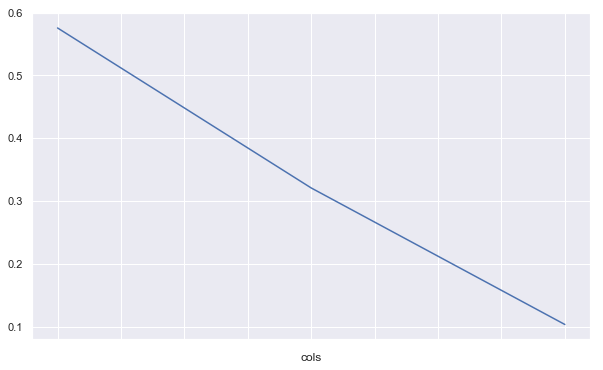

In [46]:
# Ploting the function
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [47]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(10,5), legend=False)

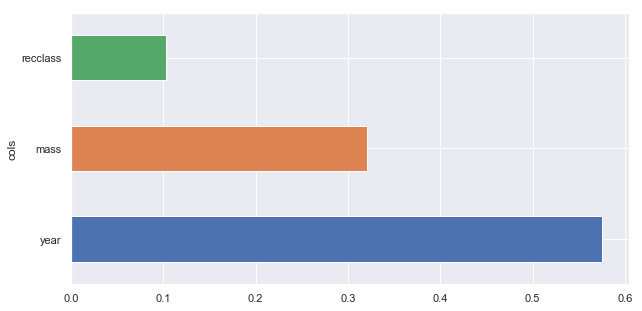

In [48]:
plot_fi(fi);

The 'year' variable was by far the most important one to predict the next meteorite landings. It's not a good sign as it indicates how the model depends on one single variable. The correlation is extremely high. Unfortunately, in this dataset, it is impossible to circumvent it. I would have needed more features (more dependent variables) to diminish this correlation.

## Application of the model
#### Replacing the missing values of the dataset by the predictions of the model

The initial dataframe (df) had about 16% of missing information in the GeoLoc column. The model that I just built could be capable (at around 60% accuracy) of filling the void by replacing the '0.00000' by the prediction of the dependent variable.

Let's start by taking a look at the original dataframe (with the missing values)

In [80]:
df.sort_values(by=['year']).tail(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
30774,Northwest Africa 7858,57423,Valid,H4,459.0,Found,2013.0,0.00000,0.00000,"(0.000000, 0.000000)"
194,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013.0,54.81667,61.11667,"(54.816670, 61.116670)"
30776,Northwest Africa 7861,57425,Valid,L5,611.0,Found,2013.0,0.00000,0.00000,"(0.000000, 0.000000)"
30778,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013.0,0.00000,0.00000,"(0.000000, 0.000000)"
30772,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013.0,0.00000,0.00000,"(0.000000, 0.000000)"


Now I will remove the missing geo-loc values and assign the result to a different dataframe, df1. Just like I did previously.

In [81]:
df1 = df[(df[['reclat','reclong']] != 0).all(axis=1)]

In [82]:
df1.sort_values(by=['year']).tail(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
17387,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012.0,32.89100,9.91300,"(32.891000, 9.913000)"
17386,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012.0,32.80600,9.83300,"(32.806000, 9.833000)"
22890,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,"(40.892010, -118.553190)"
17245,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012.0,19.77278,56.38982,"(19.772780, 56.389820)"
194,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013.0,54.81667,61.11667,"(54.816670, 61.116670)"


For the next step I will assign only the missing GeoLocation information to a new dataframe, df2, where the model can apply its results to replace the '0.0' values by actual predictions.

In [71]:
df2 = df[(df[['reclat','reclong']] == 0).all(axis=1)]

In [129]:
df2.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
596,Mason Gully,53653,Valid,3,24.54,Fell,2010.0,0.0,0.0,"(0.000000, 0.000000)"
1649,Allan Hills 09005,55797,Valid,6,122.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1650,Allan Hills 09006,55798,Valid,3,104.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1651,Allan Hills 09008,55799,Valid,3,31.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1652,Allan Hills 09009,55800,Valid,7,24.80,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1654,Allan Hills 09011,55802,Valid,9,14.20,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1655,Allan Hills 09012,55794,Valid,7,18.10,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1656,Allan Hills 09013,55795,Valid,7,25.50,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1657,Allan Hills 09014,55796,Valid,6,30.20,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1658,Allan Hills 10910,56771,Valid,6,444.10,Found,2010.0,0.0,0.0,"(0.000000, 0.000000)"


In [73]:
from sklearn.preprocessing import LabelEncoder
df2['recclass'] = LabelEncoder().fit_transform(df2['recclass'])

/Users/youcefdjeddar/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
X1 = df2[['recclass', 'mass', 'year']]
y1 = df2[['reclat', 'reclong']]

In [77]:
pred = rfr.predict(X1)

In [78]:
pred = pd.DataFrame(pred)

In [83]:
pred.columns = ['pred_reclat', 'pred_reclong']

In [90]:
pred.head(10)

,pred_reclat,pred_reclong
0,-8.117109,-14.011831
1,0.528062,50.045825
2,9.555360,35.527345
3,6.296440,4.668854
4,6.926769,38.339467
5,-12.172205,63.426861
6,4.503927,39.549358
7,6.926769,38.339467
8,-3.233342,53.683535
9,6.261402,34.711103


The predictions are now displayed in the above dataframe. For example, the meteorite "Mason Gully" would normally land in the Atlantic Ocean (-8.117109, -14.011831). Unfortunately, this prediction is not accurate as the meteorite has been observed in West Australia. I tried the same procedure with multiple meteorites and the accuracy rate was below 56%. Which is a disappointment. 

I will now add another feature to the model, the column "fall" that indicates whether a meteorite was observed or discovered. I hope to increase the prediction score.

In [107]:
from sklearn.preprocessing import LabelEncoder
df1['fall'] = LabelEncoder().fit_transform(df1['fall'])
df1['recclass'] = LabelEncoder().fit_transform(df1['recclass'])

In [108]:
X2 = df1[['recclass', 'mass', 'year', 'fall']]
y2 = df1[['reclat', 'reclong']]

In [109]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, random_state = 21)

In [120]:
rfr1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, max_depth = 10, n_jobs = -1, oob_score = True).fit(X2_train, y2_train)

In [121]:
rfr1.score(X2_valid, y2_valid)

0.5733488821928867

In [122]:
rfr1 = rfr1.predict(X2)

In [123]:
rfr1 = pd.DataFrame(rfr1)

In [125]:
rfr1.head(10)

,0,1
0,29.648711,38.663485
1,24.182917,-1.265962
2,28.749167,-9.350181
3,44.672066,7.973770
4,27.355228,27.813403
5,24.921940,39.655936
6,27.464513,-7.799738
7,39.714806,-5.397905
8,-43.950192,109.409248
9,38.343493,-9.193928


Now the algorithm says that the meteorite "Mason Gully" landed in the Middle East, which is not quite right.

## Machine Learning conclusion

After numerous tunings, algorithms, models and statistical analysis, I could not build an accurate model to predict something as detailed as the geographic location of the next meteorite landings based only on three features. I need more information to correctly identify the independent variables. Although the score of 60% is honorable, it is not as precise as I want it to be. 

The dataset needs more information, like the chemical composition of each class to determine, for example, whether a meteorite will reach planet earth or will get dezintegrated in the atmosphere prior to its landing. The missing data also played a major role in altering negatively the results of the predictions. 

# Capstone conclusion  

During this interesting journey, the following objectives were reached:
1. The dataset was properly cleaned;
2. The dataset was separated into different segments, each segment having a specific
purpose;
3. Important segments were adequately visualized via scatter plots, histograms, box plots
and map boxes;
4. Interesting statistical analysis were conducted on the dataset (t-test, EDF, PDF...);
5. The dataset was correctly encoded to be ready for the machine learning part;
6. After experimenting different machine learning algorithms (supervised and
unsupervised) and combinations (classification and regression), Random Forest
Regressor was always giving satisfying results;
7. After a multitude of tests, determining where the next meteorite landings will occur
was the most realistic prediction;
8. With only three features that can be observed and determined via telescopes, the
algorithm was giving a fair score;
9. A cross validation and a grid search were performed on the dataset to enhance the test
score and to reduce over-fitting, successfully;
10. An application of the model was performed and the results were shown on a new dataframe.